<a href="https://colab.research.google.com/github/Masoomas98/DSPS_MSarfraz/blob/main/Homeworks/Homework_2_CentralLimitTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total),
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For distribution plot the sample mean of each sample (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
-  Extra Credit (required for 661 students): FIT a gaussian to the distribution of means. i.e. to the height of the bins if a histogram of sample means           

In [ ]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize

%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use

In [ ]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which *population* mean to give it (it will be the same for each distribution)

In [ ]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this!

![1](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq1.png)

![2](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq2.png)

For chi2 the parameter is *k* degrees of freedom. the mean is mean=*k*, the variance is 2*k*

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare

In class aI used scipy.stats. You are free to use what you want!



In [ ]:
# the chi sq distribution takes the number of degrees of freedom,
# which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful! But youn can do this however you want

Lets start by looking at a single chi sq distribution of 100 elements

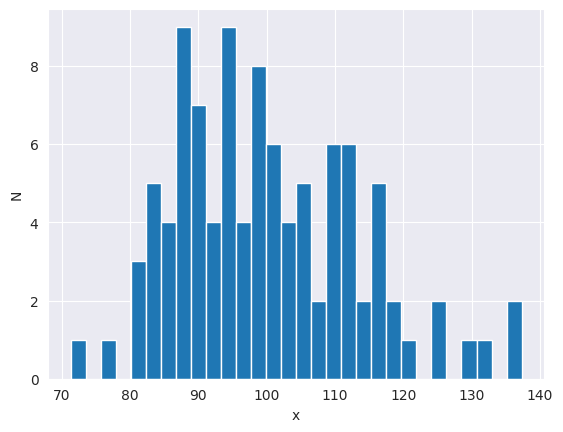

In [ ]:
# Note: I am adding imports here, to show the workflow:
# at this point I realize what packages I need and I import them.
# but this is a PEP8 violation.
# It is a good habit to put the includes at the top
# so the code fails right away if the packages are missing.
# Otherwise a user may have a piece of code running for a long time,
# and then fail when the package cannot be imported...
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456) #WHY DO I DO THIS??
# prepare a container for all the distribution:
# a dictionary so you can call each family of distribution by "key"
mydists = {}
# mydists is an empty disctionary;
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['chisq'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['chisq'][100] = np.random.chisquare(mymean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it:
#             an array of 100 elements by the key 100
pl.hist(mydists['chisq'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom.

## let numpy calculate what the mean and stdev of this distribution are

In [ ]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(mydists['chisq'][100].mean(), mydists['chisq'][100].std()))

Chisq mean: 100.09, standard deviation: 13.24


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we discussed in class). Here are some tricks to create the distribution sizes. But you do not lave to do it like this. You do you, just make it work.

In [ ]:
#mysize = (np.random.rand(100) * 1000).astype(int)
#mysize = (2000 / (np.array(range(1, 101)))).astype(int)
#mysize = (1000 / (np.array(np.arange(1, 101) + [10]))).astype(int)
mysize = (np.logspace(1, 3.3, 100, base=10).astype(int))#np.unique to not get any repetetive values

print ("shape of the 'size' list that contains the size of each distribution",
       mysize.shape, mysize)

shape of the 'size' list that contains the size of each distribution (100,) [  10   10   11   11   12   13   13   14   15   16   17   18   19   20
   21   22   23   24   26   27   29   30   32   34   36   38   40   42
   44   47   49   52   55   58   61   65   68   72   76   80   84   89
   94   99  105  111  117  123  130  137  145  153  161  170  179  189
  199  210  222  234  247  261  275  290  306  323  341  360  380  400
  422  446  470  496  523  552  582  615  648  684  722  761  803  847
  894  943  995 1050 1107 1168 1232 1300 1372 1447 1526 1610 1699 1792
 1891 1995]


Text(0, 0.5, 'frequency')

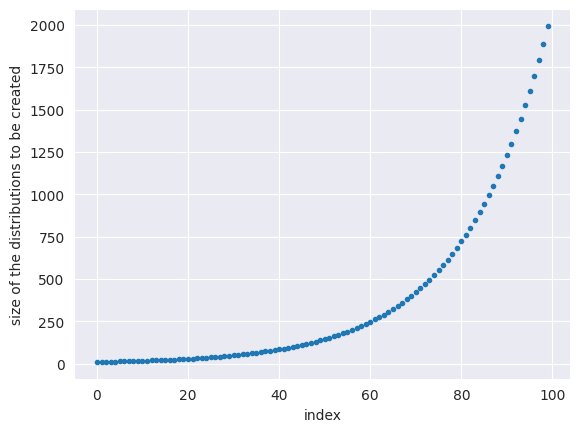

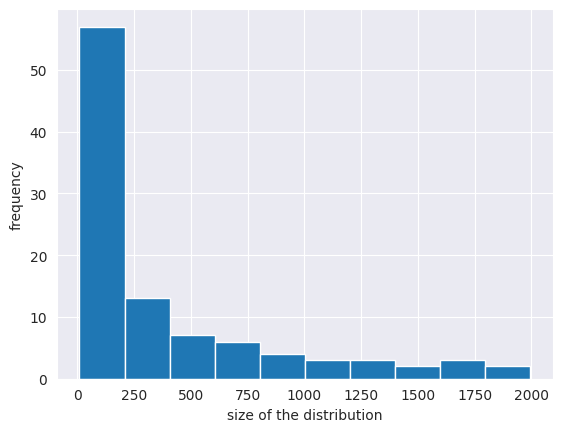

In [ ]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

pl.figure()
pl.hist(mysize)
pl.xlabel("size of the distribution")
pl.ylabel("frequency")


Figure 2: scatter plot and distribution of sample sizes for 100 samples to be created (note, the current choice does not produce more small then large distribution, which is desirable)

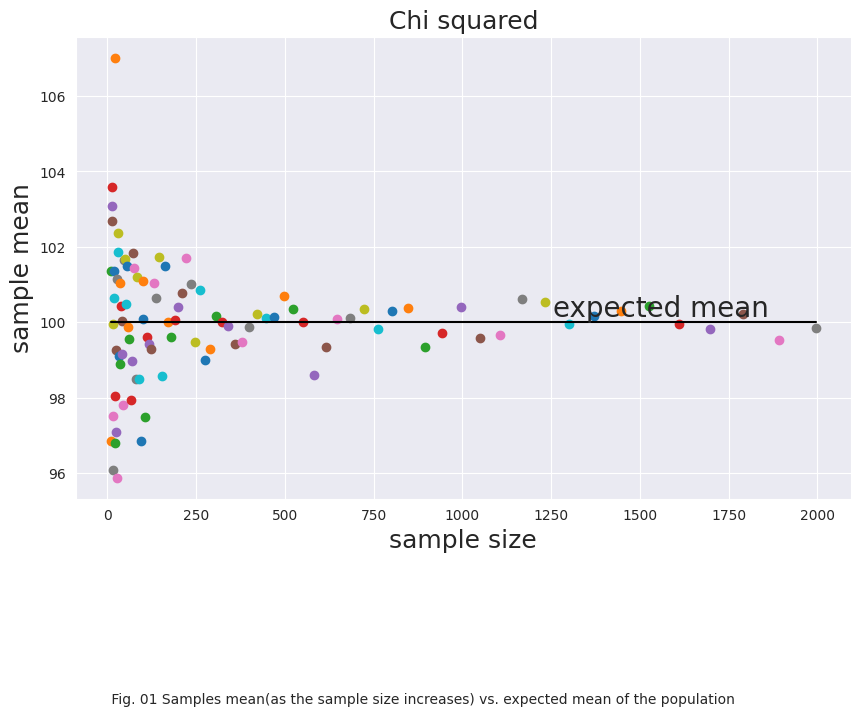

In [ ]:

# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
    mydists['chisq'][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=100

# save the means for plotting later

mydists['chisq']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['chisq']['means'][nn] = mydists['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Chi squared', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);
txt= " Fig. 01 Samples mean(as the sample size increases) vs. expected mean of the population"
axchisq_mu_n.text(0,89.90, txt )
plt.show()

### Figure 2: [describe what you see and how it relates to the law of large numbers]

For a large number of data points the sample mean converges the expected mean/ population mean.

# now the histogram of the mean of all samples:
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

In [ ]:
mydists['chisq']['means'].values()

dict_values([100.08575260718519, 96.84621851017707, 101.35057632745719, 103.57503059858008, 103.08855134596138, 102.67280417350989, 97.51912129521762, 96.08053544888853, 99.95348530691838, 100.63196161392418, 101.35440114150612, 107.01719300044279, 96.78954846101064, 98.05226133270831, 97.09283944847472, 99.27203748927951, 95.87891122578934, 101.13732304736259, 102.3610233118404, 101.8642874920852, 99.11415634703178, 101.03566170027285, 98.88082749975723, 100.43866118376782, 99.1638863085207, 100.04129628339544, 97.79501956141384, 101.65880989814146, 101.67841352544728, 100.49246425258646, 101.47648529839788, 99.87474080185983, 99.56184332982525, 97.92917468843922, 98.96323423949352, 101.82603801716806, 101.44160241364213, 98.48718273590762, 101.21019151355921, 98.48445844836073, 96.83625986120846, 101.09702190165906, 97.48672195182303, 99.59484258228035, 99.4261873754346, 99.29566388033537, 101.03926274758574, 100.64891037122598, 101.7245490661342, 98.56459719150529, 101.5018964115469

Text(93, -2, ' Fig. 02 Samples mean distribution plotted as a histogram that depicts the frequency of each sample mean')

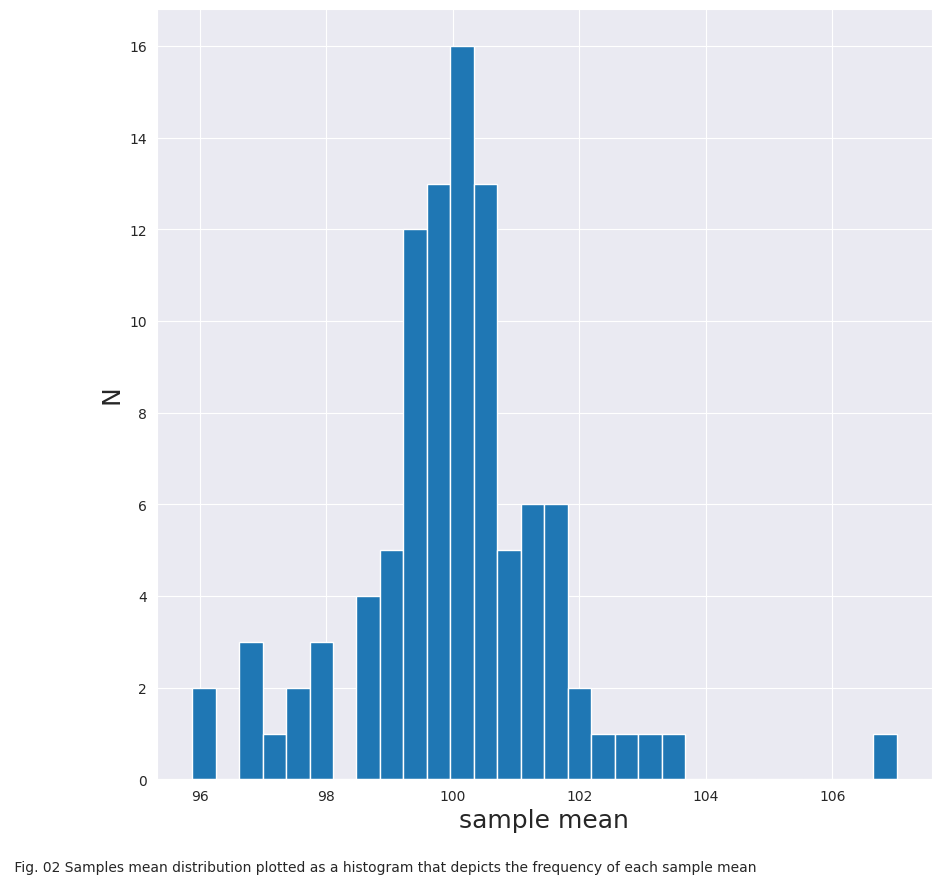

In [ ]:
allmeans = list(mydists['chisq']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans, bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);
txt= " Fig. 02 Samples mean distribution plotted as a histogram that depicts the frequency of each sample mean"
pl.text(93,-2, txt )

In [ ]:
#allmeans

## Figure 3: [...]
**So if you increase the number of data points/ values in a sample the distribution's mean will be more like the Gaussian mean/ expected mean, which in this case is 100.**

# Do it for the Normal distribution


In [ ]:
np.random.seed(456)
df = mymean
normal_d = np.random.normal(df, 1, size = 100)
#normal_d

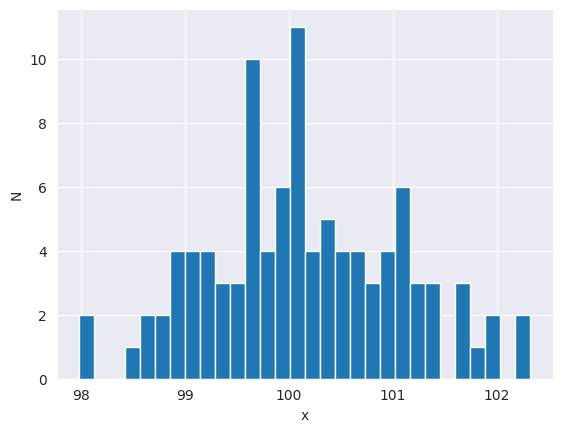

In [ ]:
# A normal distribution with mean around 100
pl.hist(normal_d, bins = 30)
pl.ylabel('N')
pl.xlabel('x');

##Figure 4: Normal distribution of a sample of size 100 and a standard deviation of 1.

In [ ]:
print(f"The mean of this distribution is :{(normal_d.mean()):.2f}")
print(f"The standard deviation is : {(normal_d.std()):.2f}")

The mean of this distribution is :100.14
The standard deviation is : 0.92


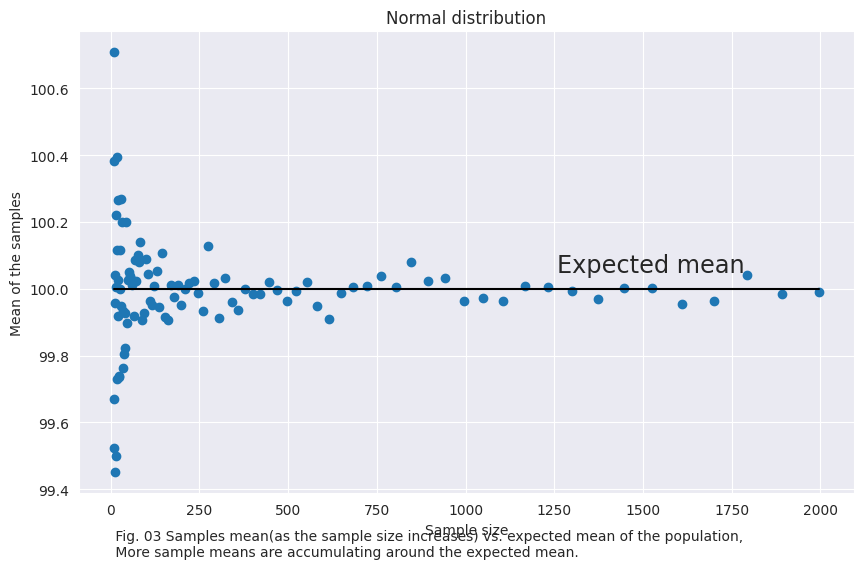

In [ ]:

# mysize has 100 different sample size values.
norm_samples =[]
norm_mean=[]
for i in mysize:
  norm = np.random.normal(df, scale= 1, size = i) #df here is my mean i defined earlier
  mean_n = np.mean(norm)
  norm_mean.append(mean_n)
  norm_samples.append(norm)
plt.figure(figsize=(10,6))
plt.scatter(mysize, norm_mean,)
plt.xlabel("Sample size")
plt.ylabel("Mean of the samples")
plt.title ("Normal distribution")
plt.plot([min(mysize), max(mysize)], [df, df], 'k')
plt.text(x=plt.xlim()[1] * 0.6, y=100.05,s="Expected mean", size="xx-large")
txt= " Fig. 03 Samples mean(as the sample size increases) vs. expected mean of the population, \n More sample means are accumulating around the expected mean."
pl.text(0,99.2, txt)
plt.show()


Text(99.4, -3, 'Fig 04 Samples mean distribution plotted as a histogram that depicts the frequency of each sample mean.')

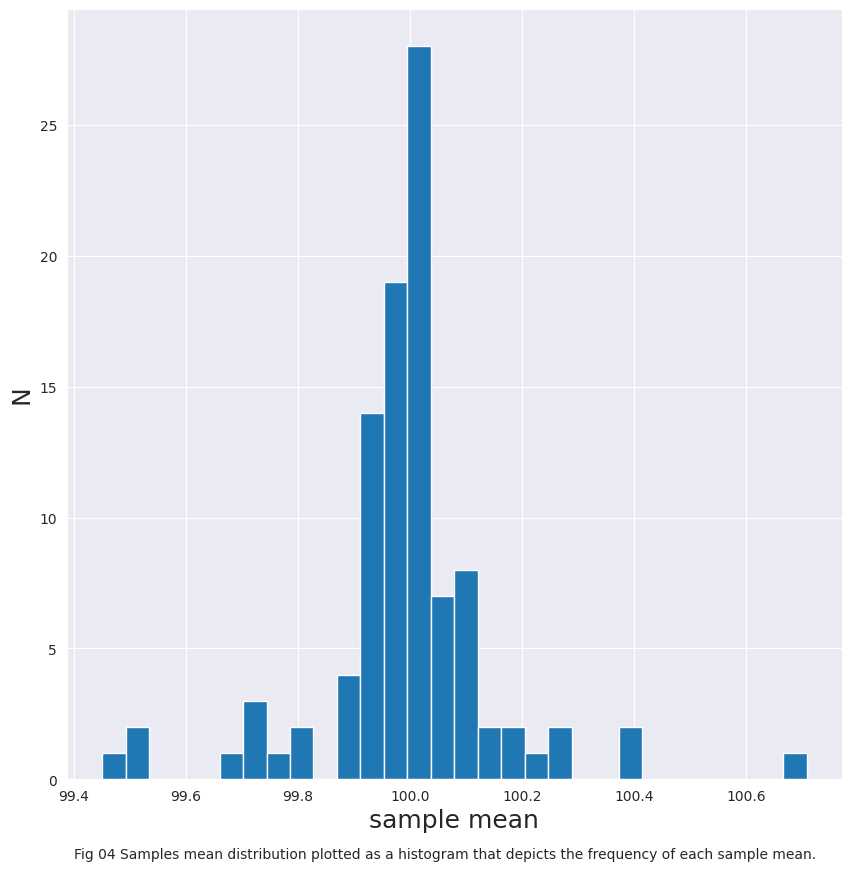

In [ ]:
pl.figure(figsize=(10, 10))
pl.hist(norm_mean,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);
txt = "Fig 04 Samples mean distribution plotted as a histogram that depicts the frequency of each sample mean."
plt.text(99.4, -3,txt)

# Do it for the Poisson distribution

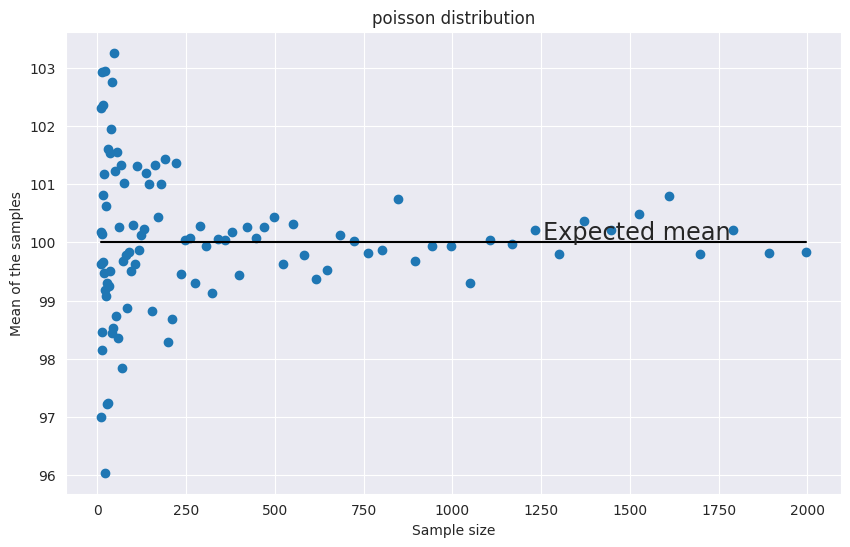

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats
mymean = 100
np.random.seed(456)
df = mymean

# mysize has 100 different sample size values.
poisson_samples =[]
poisson_mean=[]
for i in mysize:
  poisson = sp.stats.poisson.rvs(df, size = i) #df here is my mean i defined earlier
  mean_p = np.mean(poisson)
  poisson_mean.append(mean_p)
  poisson_samples.append(poisson)
plt.figure(figsize=(10,6))
plt.scatter(mysize, poisson_mean,)
plt.xlabel("Sample size")
plt.ylabel("Mean of the samples")
plt.title ("poisson distribution")
plt.plot([min(mysize), max(mysize)], [df, df], 'k')
plt.text(x=plt.xlim()[1] * 0.6, y=100.05,s="Expected mean", size="xx-large")
txt= " Fig. 05 Samples mean(as the sample size increases) vs. expected mean of the population"
axchisq_mu_n.text(0,95, txt )
plt.show()

Text(95, -2, 'Fig 06 Samples mean distribution plotted as a histogram that depicts the frequency of each sample mean.')

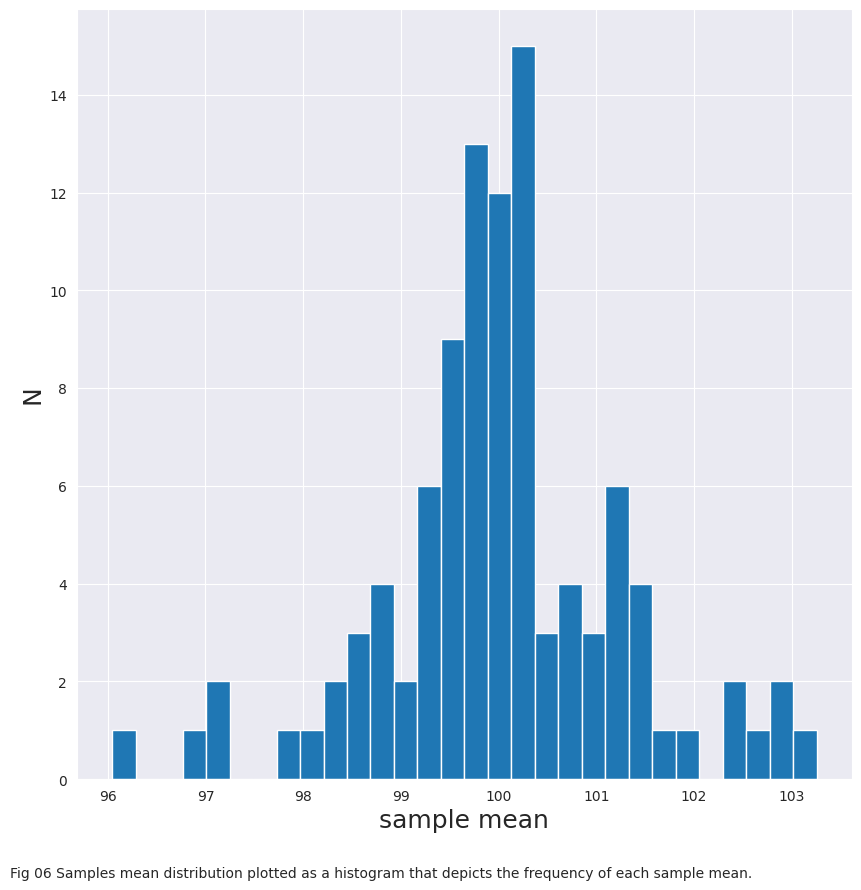

In [ ]:
pl.figure(figsize=(10, 10))
pl.hist(poisson_mean,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);
txt = "Fig 06 Samples mean distribution plotted as a histogram that depicts the frequency of each sample mean."
plt.text(95, -2,txt)

# Do it for the Binomial distribution

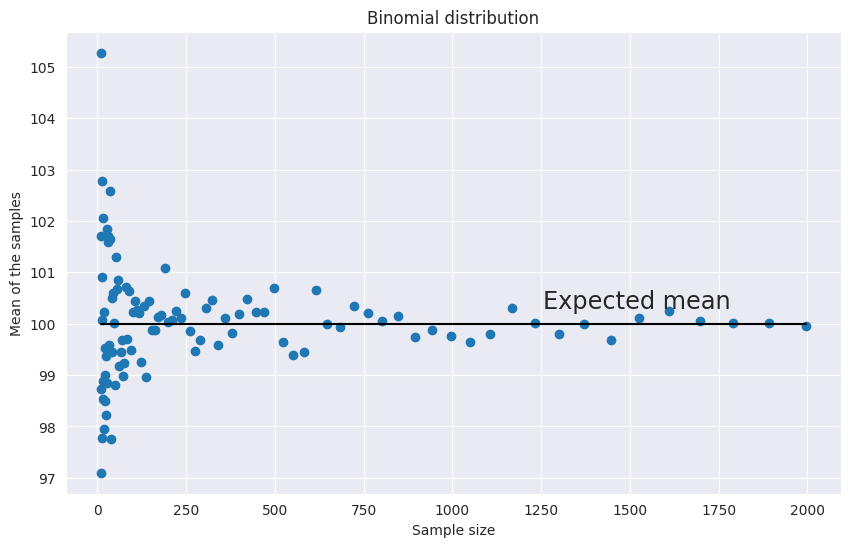

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats
mymean = 100
np.random.seed(456)
df = mymean
# mysize has 100 different sample size values.
binom_samples =[]
binom_mean =[]

for i in mysize:
  binom= sp.stats.binom.rvs(200 ,0.5, loc=0, size = i) # for binomial distribution n*p gives you the mean
  mean_b = np.mean(binom)
  binom_mean.append(mean_b)
  binom_samples.append(binom)
plt.figure(figsize =(10,6))
plt.scatter(mysize, binom_mean)
plt.xlabel("Sample size")
plt.ylabel("Mean of the samples")
plt.title ("Binomial distribution")
plt.plot([min(mysize), max(mysize)], [df, df], 'k')
plt.text(x=plt.xlim()[1] * 0.6, y=100.3,s="Expected mean", size="xx-large")
txt= " Fig. 07 Samples mean(as the sample size increases) vs. expected mean of the population"
axchisq_mu_n.text(0,89.90, txt )
plt.show()

Text(97, -2, 'Fig 08 Samples mean distribution plotted as a histogram that depicts the frequency of each sample mean.')

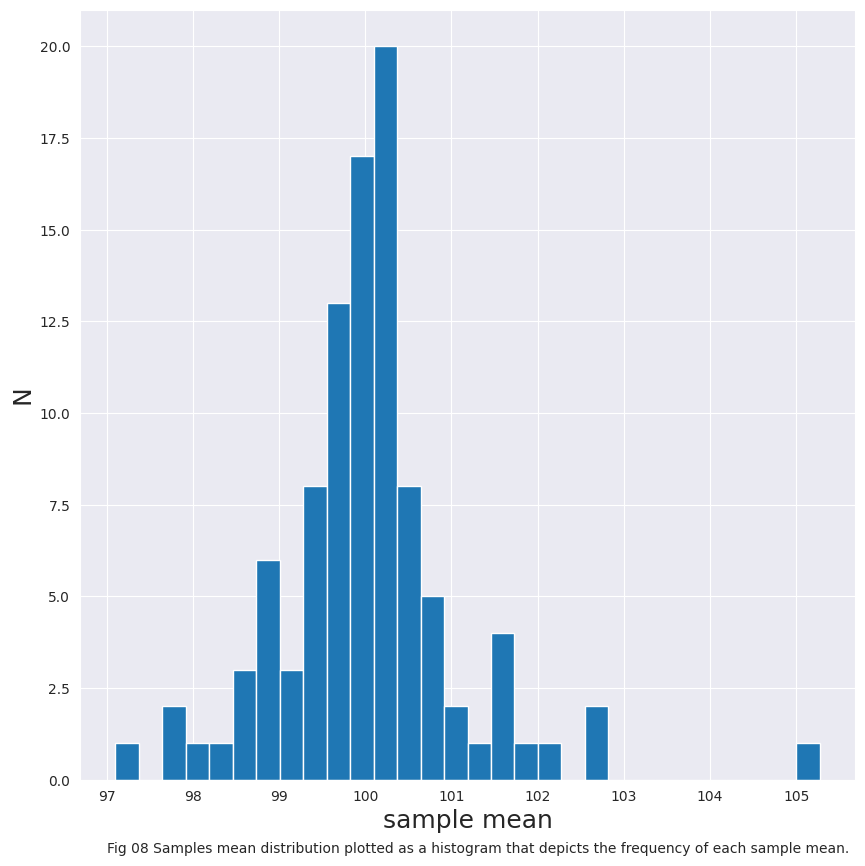

In [ ]:
pl.figure(figsize=(10, 10))
pl.hist(binom_mean,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);
txt = "Fig 08 Samples mean distribution plotted as a histogram that depicts the frequency of each sample mean."
plt.text(97, -2,txt)

# Do it for another distribution

### For Cauchy Distribution

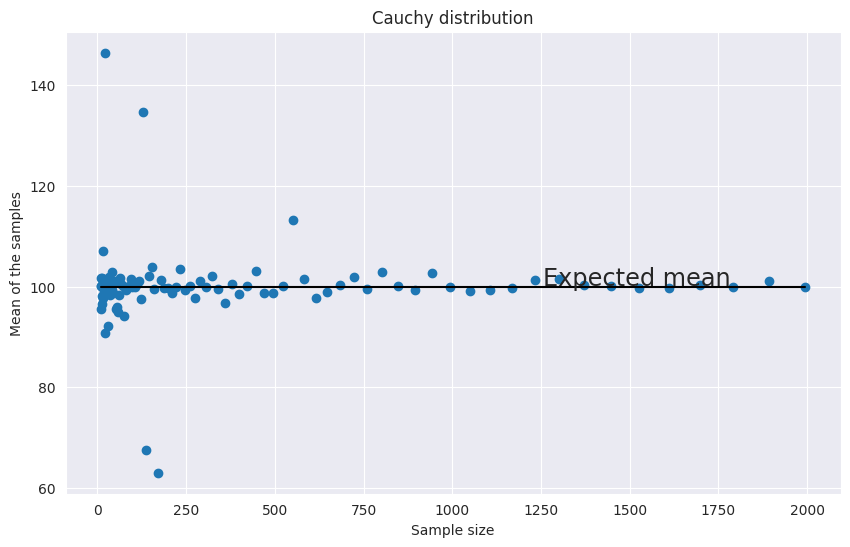

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats
mymean = 100
np.random.seed(456)
df = mymean

# mysize has 100 different sample size values.
cauchy_samples =[]
cauchy_mean=[]
for i in mysize:
  cauchy = sp.stats.cauchy.rvs(df, scale= 1, size = i) #df here is my mean i defined earlier
  mean_c = np.mean(cauchy)
  cauchy_mean.append(mean_c)
  cauchy_samples.append(cauchy)
plt.figure(figsize=(10,6))
plt.scatter(mysize, cauchy_mean)
plt.xlabel("Sample size")
plt.ylabel("Mean of the samples")
plt.title ("Cauchy distribution")
plt.plot([min(mysize), max(mysize)], [df, df], 'k')
plt.text(x=plt.xlim()[1] * 0.6, y=100.3,s="Expected mean", size="xx-large")
txt= " Fig. 09 Samples mean(as the sample size increases) vs. expected mean of the population but there are some outliers in this case"
axchisq_mu_n.text(0,59, txt )
plt.show()

Text(60, -5.5, 'Fig 10 Samples mean distribution plotted as a histogram that depicts the frequency of each sample mean.')

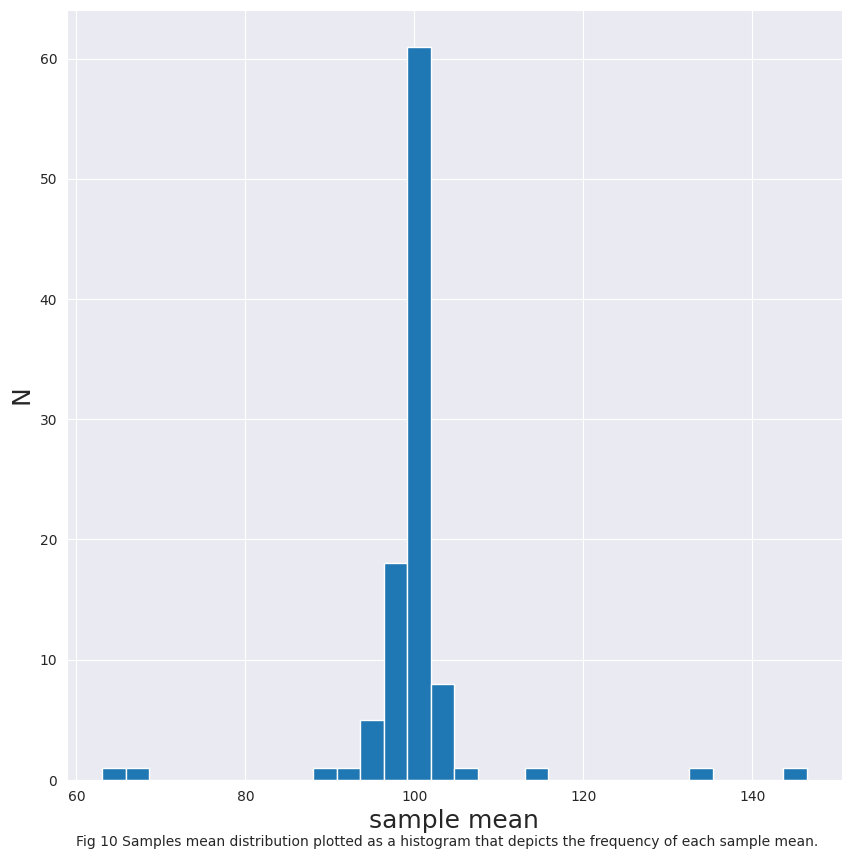

In [ ]:
pl.figure(figsize=(10, 10))
pl.hist(cauchy_mean,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);
txt = "Fig 10 Samples mean distribution plotted as a histogram that depicts the frequency of each sample mean."
plt.text(60, -5.5,txt)

# 661 students: fits  a Gaussian to the histogram of the means for each distribution

# Extra Credit for 461

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the hight of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram.
(be careful that the x axis and the y axis are not the same size when you extract them from the pl.hist function cause the x represents the **edges** while what you want is the **centers** of each bin

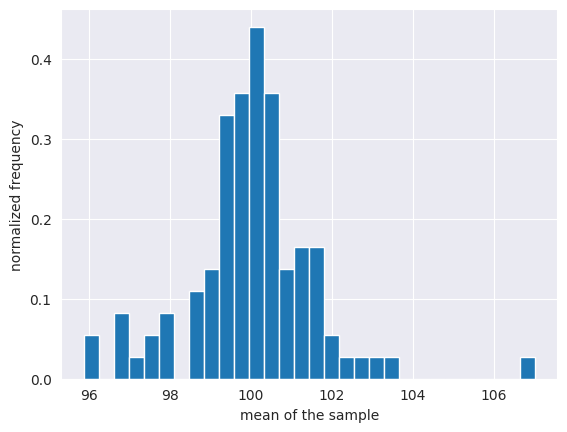

In [ ]:
height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");

And you can create your own Gaussian function to pass to curve_fit as this for example:

In [ ]:
def gaussian(x, mu, sigma): # this is the gaussian you will fit
  '''
  Gaussian function has two paramters mean ,mu, and standard deviation, sigma and the output is a contiuous distribution with mean and sigma, it is a symmetric distribution around the mean.
  '''
  g = 1 *(sigma* (np.sqrt(2 * np.pi))**(-1))* np.exp(-0.5*((x - mu )/sigma)**2 )
  return g

'''
def fun(args, x, hb): # this is the function you will minimize
  ...
  return ... # needs to return a single number representing the "distance" between the heigh of the histogram bins and the gaussian you create'''

#we dont need another fuction as we are using scipy.optimize.curve_fit, but we might need another loss function if we are using scipy.optimize.minimize

'\ndef fun(args, x, hb): # this is the function you will minimize\n  ...\n  return ... # needs to return a single number representing the "distance" between the heigh of the histogram bins and the gaussian you create'

Text(0, -0.05, ' Just to check the normal/gaussian distribution is rigth')

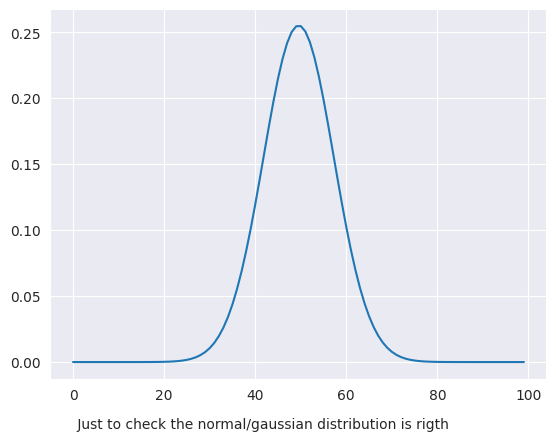

In [ ]:
domain = np.linspace(90,110,100)
#using gaussian/ normal distribution in built in scipy
gauss = stats.norm.pdf(domain, np.mean(allmeans), np.std(allmeans))
plt.plot(gauss)
#print(len(gauss))
min = np.min(allmeans)
max= np.max(allmeans)
# x_m = np.linspace(min,max,len(gauss))

txt = " Just to check the normal/gaussian distribution is rigth"
plt.text(0,-0.05,txt)

### For chisquare distribution

Text(90, -0.16, 'Fig 12 In the limit of N -> infinity the sample mean x approaches a Normal (Gaussian) \n distribution with mean μ and standard deviation σ \n regardless of the distribution of X.')

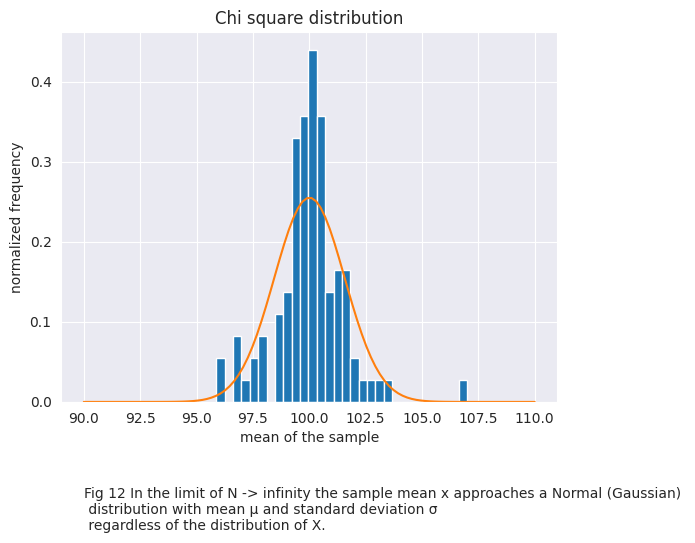

In [ ]:
plt.hist(allmeans, bins=30, density=True)
plt.plot(domain,gauss)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");
pl.title("Chi square distribution")
txt = "Fig 12 In the limit of N -> infinity the sample mean x approaches a Normal (Gaussian) \n distribution with mean μ and standard deviation σ \n regardless of the distribution of X."
plt.text(90,-0.16,txt)

Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)

### For  normal distribution

Text(90, -1.3, 'Fig 12 In the limit of N -> infinity the sample mean x approaches a Normal (Gaussian) distribution \n with mean μ and standard deviation σregardless of the distribution of X.')

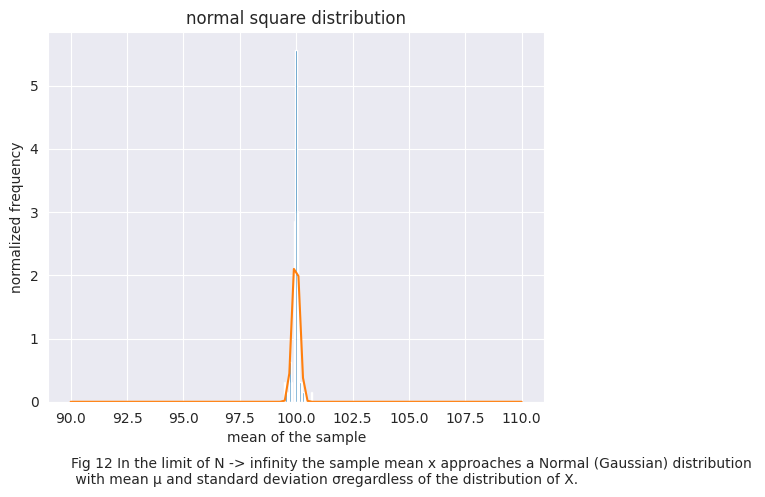

In [ ]:
plt.hist(norm_mean, bins=20, density=True)
gauss_n = stats.norm.pdf(domain, np.mean(norm_mean), np.std(norm_mean))
plt.plot(domain,gauss_n)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");
pl.title("normal square distribution")
txt = "Fig 12 In the limit of N -> infinity the sample mean x approaches a Normal (Gaussian) distribution \n with mean μ and standard deviation σregardless of the distribution of X."
plt.text(90,-1.3,txt)

### For poisson distribution

Text(89.5, -0.15, 'Fig 12 In the limit of N -> infinity the sample mean x approaches a Normal (Gaussian) distribution \n with mean μ and standard deviation σregardless of the distribution of X.')

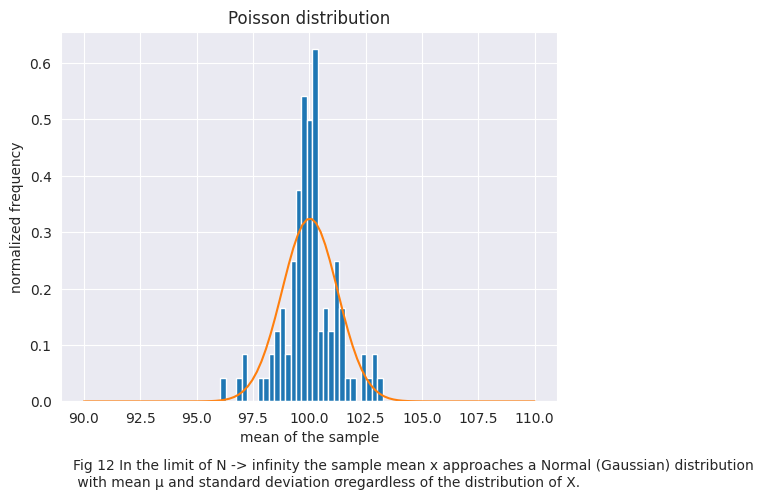

In [ ]:
plt.hist(poisson_mean, bins=30, density=True)
gauss_p = stats.norm.pdf(domain, np.mean(poisson_mean), np.std(poisson_mean))
plt.plot(domain,gauss_p)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");
pl.title("Poisson distribution")
txt = "Fig 12 In the limit of N -> infinity the sample mean x approaches a Normal (Gaussian) distribution \n with mean μ and standard deviation σregardless of the distribution of X."
plt.text(89.5,-0.15,txt)

### For binomial Distribution

Text(90, -0.3, 'Fig 12 In the limit of N -> infinity the sample mean x approaches a Normal (Gaussian) distribution with mean μ \n and standard deviation σregardless of the distribution of X.')

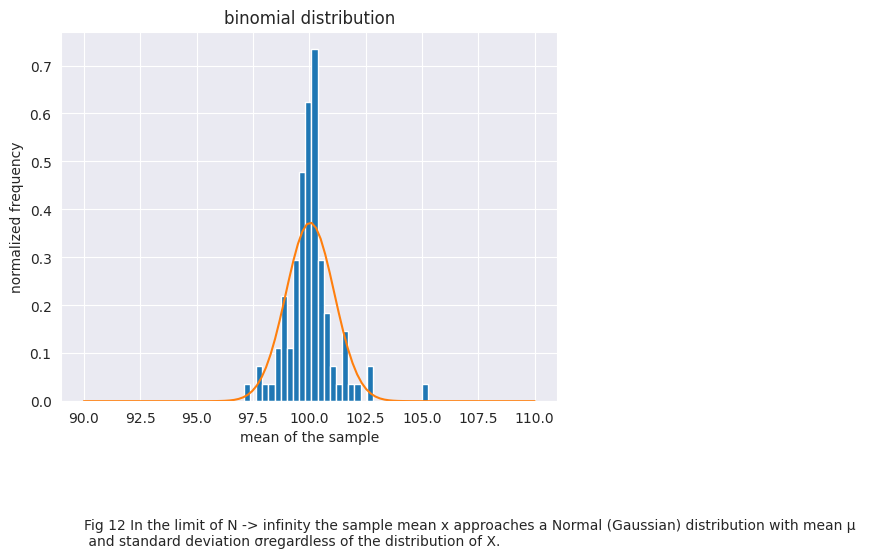

In [ ]:
plt.hist(binom_mean, bins=30, density=True)
gauss_b = stats.norm.pdf(domain, np.mean(binom_mean), np.std(binom_mean))
plt.plot(domain,gauss_b)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");
pl.title("binomial distribution")
txt = "Fig 12 In the limit of N -> infinity the sample mean x approaches a Normal (Gaussian) distribution with mean μ \n and standard deviation σregardless of the distribution of X."
plt.text(90,-0.3,txt)

### For cauchy Distribution

Text(60, -0.1, "Fig 12 In the limit of N -> infinity the sample mean x approaches a Normal (Gaussian) distribution with mean μ \n and standard deviation σregardless of the distribution of X, \n however this is not the case for cauchy distribution and we don't know why.")

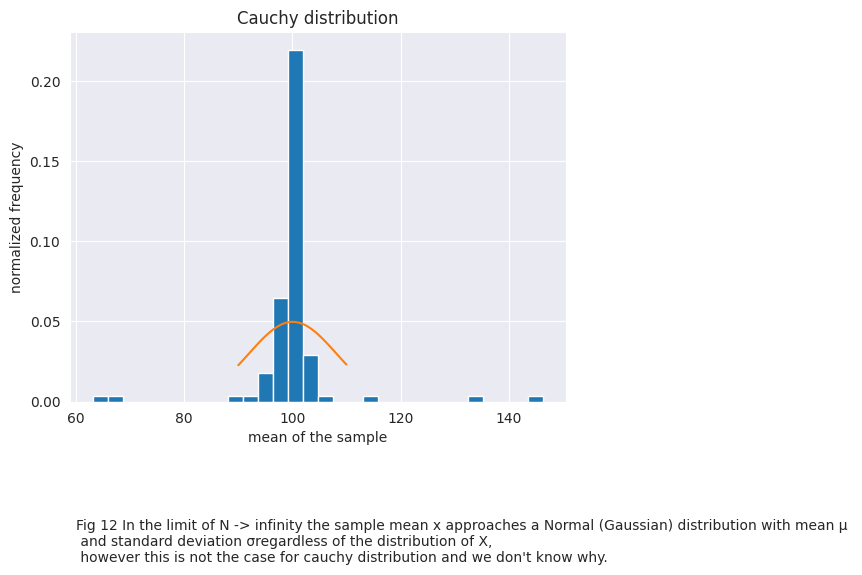

In [ ]:
plt.hist(cauchy_mean, bins=30, density=True)
gauss_c = stats.norm.pdf(domain, np.mean(cauchy_mean), np.std(cauchy_mean))
plt.plot(domain,gauss_c)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");
pl.title("Cauchy distribution")
txt = "Fig 12 In the limit of N -> infinity the sample mean x approaches a Normal (Gaussian) distribution with mean μ \n and standard deviation σregardless of the distribution of X, \n however this is not the case for cauchy distribution and we don't know why."
plt.text(60,-0.1,txt)

**You can do it by eye** (partial credit 0.5/1).

It would be better to do it programmatically. To fit the data you can use `scipy.minimize` or `scipy.optimize`

In [ ]:
from scipy import optimize
optimize.minimize?


In [ ]:
sp.optimize.fmin?